## Healthcare Stroke Dataset

### The dataset, titled "Healthcare Stroke Dataset," contains information on various health-related attributes of individuals to predict stroke occurrences. It includes 12 columns such as gender, age, hypertension, heart_disease, avg_glucose_level, and bmi. Categorical data like smoking_status and work_type are also present, along with the target variable stroke indicating whether a person experienced a stroke. This dataset is valuable for building machine learning models to understand and predict stroke risk factors. Cleaning and preprocessing, such as handling missing values and encoding categorical variables, are necessary for effective analysis.









#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


#### Load The Dataset

In [2]:
data=pd.read_csv(r"C:\Users\Adithya\Downloads\healthcare-dataset-stroke-data.csv")
df=pd.DataFrame(data)
print(df.to_string())

         id  gender    age  hypertension  heart_disease ever_married      work_type Residence_type  avg_glucose_level   bmi   smoking_status  stroke
0      9046    Male  67.00             0              1          Yes        Private          Urban             228.69  36.6  formerly smoked       1
1     51676  Female  61.00             0              0          Yes  Self-employed          Rural             202.21   NaN     never smoked       1
2     31112    Male  80.00             0              1          Yes        Private          Rural             105.92  32.5     never smoked       1
3     60182  Female  49.00             0              0          Yes        Private          Urban             171.23  34.4           smokes       1
4      1665  Female  79.00             1              0          Yes  Self-employed          Rural             174.12  24.0     never smoked       1
5     56669    Male  81.00             0              0          Yes        Private          Urban        

#### Checking Information

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


#### Checking Null Values

In [4]:
df.isna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


#### Cleaning Empty Cells

In [5]:
new_df=df.dropna(inplace=True)
print(new_df)

None


#### Convert categorical variables to numerical using one-hot encoding

In [6]:
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)


####  Define features (X) and target (y)

In [7]:
X = data.drop(columns=['id', 'stroke'])
y = data['stroke']


#### Split the data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#### Train a Random Forest Classifier

In [9]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

####  Make predictions

In [10]:
y_pred = model.predict(X_test)

####  Evaluate the model

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



####  Scatter Plot

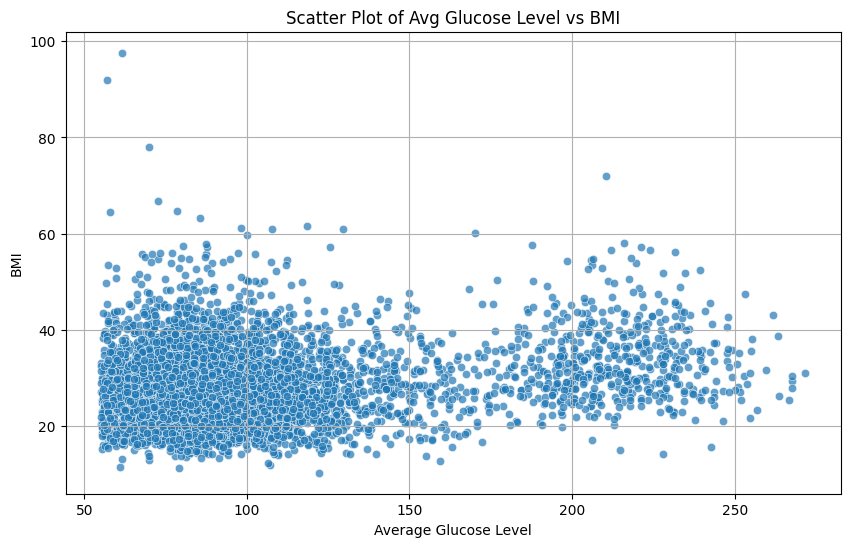

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['avg_glucose_level'],
    y=df['bmi'],
    alpha=0.7
)
plt.title('Scatter Plot of Avg Glucose Level vs BMI')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.grid(True)
plt.show()